In [1]:
# !!! Run download model weights in the package directory if they don't already exist
#import sys
#sys.path.append('./midi-ddsp/')
import midi_ddsp
import pretty_midi
import os

# Define the path or paths of the model weights or relevant files you expect after downloading
expected_file_path = './midi_ddsp_model_weights_urmp_9_10'  # Adjust this to your file's expected location

# Save the current working directory
original_dir = os.getcwd()

# Get the path to the midi_ddsp package
package_path = os.path.dirname(midi_ddsp.__file__)
print(f"Package directory: {package_path}")

# Change to the package directory
os.chdir(package_path)

# Check if the model weights or relevant files already exist
if not os.path.exists(expected_file_path):
    print("Downloading model weights...")
    # Execute the script to download model weights
    %run download_model_weights.py
else:
    print("Model weights already exist. No need to download.")

# Return to the original directory
os.chdir(original_dir)
print(f"Returned to original directory: {os.getcwd()}")

#@title #Install Dependencies, Import Code and Setup Models

#@markdown Run this cell to install dependencies, import codes, 
#@markdown setup utility functions and load MIDI-DDSP model weights.
#@markdown Running this cell could take a while.
# %pip install -q git+https://github.com/lukewys/qgrid.git

# # !pip install -q git+https://github.com/magenta/midi-ddsp
import os

# !!! Run these once
if not os.path.exists('./midi-ddsp') or not os.path.exists('./FluidR3_GM.zip'):
    # Your commands
    !git clone -q https://github.com/magenta/midi-ddsp.git
    !wget -q https://keymusician01.s3.amazonaws.com/FluidR3_GM.zip
    !unzip -q FluidR3_GM.zip
else:
    print('The required resources are already present.')

# Ignore a bunch of deprecation warnings
import sys
sys.path.append('./midi-ddsp')
import warnings
warnings.filterwarnings("ignore")

import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
import pandas as pd
import qgrid
import music21
from IPython.display import Javascript
import IPython.display as ipd
# from google.colab import files
# from google.colab import output
# output.enable_custom_widget_manager()

from midi_ddsp import load_pretrained_model
from midi_ddsp.utils.training_utils import set_seed, get_hp

from funcs import *

set_seed(1234)
sample_rate = 16000

synthesis_generator, expression_generator = load_pretrained_model()

print('Done!')


/home/z/anaconda3/envs/md-gpu2/lib/python3.8/site-packages/midi_ddsp/midi_ddsp_synthesize.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/home/z/anaconda3/envs/md-gpu2/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/z/anaconda3/envs/md-gpu2/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't 

Package directory: /home/z/anaconda3/envs/md-gpu2/lib/python3.8/site-packages/midi_ddsp
Model weights already exist. No need to download.
Returned to original directory: /home/z/data-proc/MIDI-DDSP
The required resources are already present.
Done!


In [3]:
midi_path = "Abide_by_Me_modified.midi"
# midi_path = "../xml2midi/test_cresc_desc_modified.midi"
midi = pretty_midi.PrettyMIDI(midi_path)
inst = "violin"

Generating:   0%|          | 0/9944 [00:00<?, ?it/s]

Generating:   0%|          | 0/9944 [00:00<?, ?it/s]

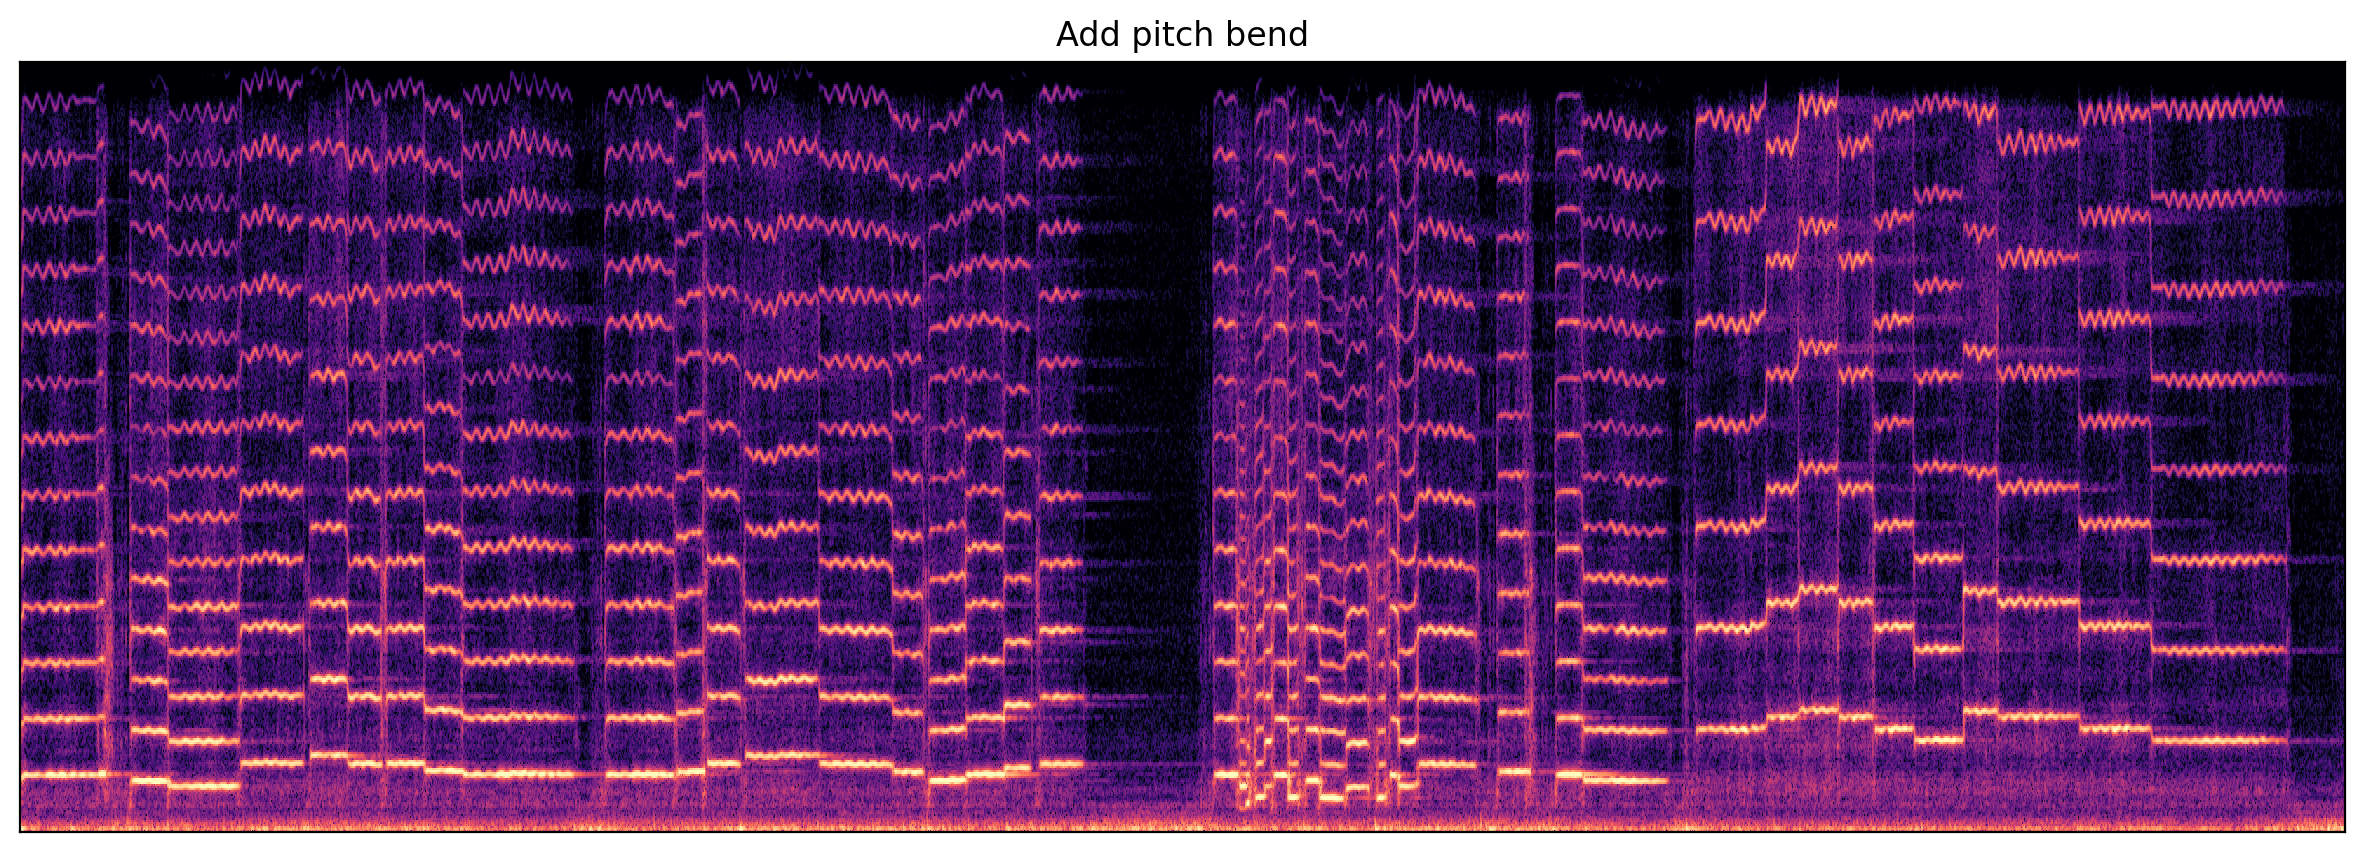

In [10]:
midi_audio_changed, conditioning_df, midi_synth_params = generate_audio_from_midi(synthesis_generator, expression_generator, midi_path, inst, inst_num=0)
plt.figure(figsize=(15,5))
plot_spec(midi_audio_changed[0].numpy(), sr=16000, title='Add pitch bend')
plt.show()